In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghosh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ghosh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ghosh\AppData\Roaming\nltk_data...


True

In [25]:
train_df = pd.read_csv("C:\\Users\\ghosh\\Downloads\\archive\\train.csv")
train_df.head()

,ind,activity_label,ctx_a,ctx_b,ctx,endings,source_id,split,split_type,label
0,4,Removing ice from car,"Then, the man writes over the snow covering th...",then,"Then, the man writes over the snow covering th...","[', the man adds wax to the windshield and cut...",activitynet~v_-1IBHYS3L-Y,train,indomain,3
1,8,Baking cookies,A female chef in white uniform shows a stack o...,the pans,A female chef in white uniform shows a stack o...,['contain egg yolks and baking soda.'\n 'are t...,activitynet~v_-2dxp-mv2zo,train,indomain,3
2,9,Baking cookies,A female chef in white uniform shows a stack o...,a knife,A female chef in white uniform shows a stack o...,['is seen moving on a board and cutting out it...,activitynet~v_-2dxp-mv2zo,train,indomain,3
3,12,Baking cookies,A tray of potatoes is loaded into the oven and...,a large tray of meat,A tray of potatoes is loaded into the oven and...,"['is placed onto a baked potato.'\n ', ls, and...",activitynet~v_-2dxp-mv2zo,train,indomain,3
4,27,Getting a haircut,The man in the center is demonstrating a hairs...,the man in the blue shirt,The man in the center is demonstrating a hairs...,['is standing on the sponge cutting the hair o...,activitynet~v_-JqLjPz-07E,train,indomain,2


In [26]:
train_df.isnull().sum()

ind                   0
activity_label        0
ctx_a                 0
ctx_b             25165
ctx                   0
endings               0
source_id             0
split                 0
split_type            0
label                 0
dtype: int64

In [27]:
train_df.drop(['ind', 'source_id', 'split', 'split_type'], axis=1, inplace=True)
train_df.head()

,activity_label,ctx_a,ctx_b,ctx,endings,label
0,Removing ice from car,"Then, the man writes over the snow covering th...",then,"Then, the man writes over the snow covering th...","[', the man adds wax to the windshield and cut...",3
1,Baking cookies,A female chef in white uniform shows a stack o...,the pans,A female chef in white uniform shows a stack o...,['contain egg yolks and baking soda.'\n 'are t...,3
2,Baking cookies,A female chef in white uniform shows a stack o...,a knife,A female chef in white uniform shows a stack o...,['is seen moving on a board and cutting out it...,3
3,Baking cookies,A tray of potatoes is loaded into the oven and...,a large tray of meat,A tray of potatoes is loaded into the oven and...,"['is placed onto a baked potato.'\n ', ls, and...",3
4,Getting a haircut,The man in the center is demonstrating a hairs...,the man in the blue shirt,The man in the center is demonstrating a hairs...,['is standing on the sponge cutting the hair o...,2


In [28]:
a0_list = []
a1_list = []
a2_list = []
a3_list = []
# split endings column into 4 separate columns iterating over row and checking for quotes
for i in range(len(train_df)):
    count = 0
    str_0 = ''
    str_1 = ''
    str_2 = ''
    str_3 = ''

    flag_single_quote = 0
    flag_double_quote = 0

    for j in train_df['endings'][i]:


        if(j == '\'' and flag_single_quote == 1):
            flag_single_quote = 0
            count += 1
            continue

        if(j == '\"' and flag_double_quote == 1):
            flag_double_quote = 0
            count += 1
            continue

        # if flag_single_quote==0 and flag_double_quote==0:
        #     continue


        if(j == '\'' and flag_single_quote == 0 and flag_double_quote != 1):
            flag_single_quote = 1
            count += 1

        if(flag_single_quote == 1 and flag_double_quote != 1):
            if(count == 1):
                str_0 += j
            elif(count == 3):
                str_1 += j
            elif(count == 5):
                str_2 += j
            elif(count == 7):
                str_3 += j

        if(j == '\"' and flag_double_quote == 0 and flag_single_quote != 1):
            flag_double_quote = 1
            count += 1

        if(flag_double_quote == 1 and flag_single_quote != 1):
            if(count == 1):
                str_0 += j
            elif(count == 3):
                str_1 += j
            elif(count == 5):
                str_2 += j
            elif(count == 7):
                str_3 += j

    a0_list.append(str_0)
    a1_list.append(str_1)
    a2_list.append(str_2)
    a3_list.append(str_3)

In [29]:
train_df.drop(['endings'], axis=1, inplace=True)

# insert the 4 new columns into the dataframe before the labels column
train_df.insert(4, 'A0', a0_list)
train_df.insert(5, 'A1', a1_list)
train_df.insert(6, 'A2', a2_list)
train_df.insert(7, 'A3', a3_list)

train_df.head()

,activity_label,ctx_a,ctx_b,ctx,A0,A1,A2,A3,label
0,Removing ice from car,"Then, the man writes over the snow covering th...",then,"Then, the man writes over the snow covering th...","', the man adds wax to the windshield and cuts...","', a person board a ski lift, while two men su...","', the man puts on a christmas coat, knitted w...","', the man continues removing the snow on his ...",3
1,Baking cookies,A female chef in white uniform shows a stack o...,the pans,A female chef in white uniform shows a stack o...,'contain egg yolks and baking soda.,'are then sprinkled with brown sugar.,'are placed in a strainer on the counter.,'are filled with pastries and loaded into the ...,3
2,Baking cookies,A female chef in white uniform shows a stack o...,a knife,A female chef in white uniform shows a stack o...,'is seen moving on a board and cutting out its...,"'hits the peeled cheesecake, followed by slice...",'etches a shape into the inside of the baked p...,'is used to cut cylinder shaped dough into rou...,3
3,Baking cookies,A tray of potatoes is loaded into the oven and...,a large tray of meat,A tray of potatoes is loaded into the oven and...,'is placed onto a baked potato.,"', ls, and pickles are placed in the oven.",'is poured into a midden.,'is prepared then it is removed from the oven ...,3
4,Getting a haircut,The man in the center is demonstrating a hairs...,the man in the blue shirt,The man in the center is demonstrating a hairs...,'is standing on the sponge cutting the hair of...,'is doing the hairstyle with his hand and the ...,'sits on the chair next to the sink.,'is being shown eye to eye.,2


In [30]:
right_end=[]
for i in range(len(train_df)):
    if(train_df['label'][i]==0):
        right_end.append(a0_list[i])
    if(train_df['label'][i]==1):
        right_end.append(a1_list[i])
    if(train_df['label'][i]==2):
        right_end.append(a2_list[i])
    if(train_df['label'][i]==3):
        right_end.append(a3_list[i])   

In [31]:
modified_array = [s[1:] for s in right_end]

In [32]:
train_df.insert(8,'Ans',modified_array)
train_df.head()

,activity_label,ctx_a,ctx_b,ctx,A0,A1,A2,A3,Ans,label
0,Removing ice from car,"Then, the man writes over the snow covering th...",then,"Then, the man writes over the snow covering th...","', the man adds wax to the windshield and cuts...","', a person board a ski lift, while two men su...","', the man puts on a christmas coat, knitted w...","', the man continues removing the snow on his ...",", the man continues removing the snow on his car.",3
1,Baking cookies,A female chef in white uniform shows a stack o...,the pans,A female chef in white uniform shows a stack o...,'contain egg yolks and baking soda.,'are then sprinkled with brown sugar.,'are placed in a strainer on the counter.,'are filled with pastries and loaded into the ...,are filled with pastries and loaded into the o...,3
2,Baking cookies,A female chef in white uniform shows a stack o...,a knife,A female chef in white uniform shows a stack o...,'is seen moving on a board and cutting out its...,"'hits the peeled cheesecake, followed by slice...",'etches a shape into the inside of the baked p...,'is used to cut cylinder shaped dough into rou...,is used to cut cylinder shaped dough into rounds.,3
3,Baking cookies,A tray of potatoes is loaded into the oven and...,a large tray of meat,A tray of potatoes is loaded into the oven and...,'is placed onto a baked potato.,"', ls, and pickles are placed in the oven.",'is poured into a midden.,'is prepared then it is removed from the oven ...,is prepared then it is removed from the oven b...,3
4,Getting a haircut,The man in the center is demonstrating a hairs...,the man in the blue shirt,The man in the center is demonstrating a hairs...,'is standing on the sponge cutting the hair of...,'is doing the hairstyle with his hand and the ...,'sits on the chair next to the sink.,'is being shown eye to eye.,sits on the chair next to the sink.,2


In [33]:
train_df.drop(['ctx_a', 'ctx_b', 'A0', 'A1','A2','A3','label'], axis=1, inplace=True)
train_df.head()

,activity_label,ctx,Ans
0,Removing ice from car,"Then, the man writes over the snow covering th...",", the man continues removing the snow on his car."
1,Baking cookies,A female chef in white uniform shows a stack o...,are filled with pastries and loaded into the o...
2,Baking cookies,A female chef in white uniform shows a stack o...,is used to cut cylinder shaped dough into rounds.
3,Baking cookies,A tray of potatoes is loaded into the oven and...,is prepared then it is removed from the oven b...
4,Getting a haircut,The man in the center is demonstrating a hairs...,sits on the chair next to the sink.


In [34]:
copy_train_df=train_df

In [35]:
corpus=[]
for i in range(len(train_df)):
    corpus.append(train_df['ctx'][i]+' '+train_df['Ans'][i])
print(corpus[99])
print(train_df['ctx'][99])

A cheer-leading team begins to hold up posters as their mascot runs behind them. they then begin to do a routine and some of the girls run with streamers as the rest of them hold up the girls for their stunt.
A cheer-leading team begins to hold up posters as their mascot runs behind them. they


In [36]:
train_df.insert(3,'Sentence',corpus)
train_df.head()

,activity_label,ctx,Ans,Sentence
0,Removing ice from car,"Then, the man writes over the snow covering th...",", the man continues removing the snow on his car.","Then, the man writes over the snow covering th..."
1,Baking cookies,A female chef in white uniform shows a stack o...,are filled with pastries and loaded into the o...,A female chef in white uniform shows a stack o...
2,Baking cookies,A female chef in white uniform shows a stack o...,is used to cut cylinder shaped dough into rounds.,A female chef in white uniform shows a stack o...
3,Baking cookies,A tray of potatoes is loaded into the oven and...,is prepared then it is removed from the oven b...,A tray of potatoes is loaded into the oven and...
4,Getting a haircut,The man in the center is demonstrating a hairs...,sits on the chair next to the sink.,The man in the center is demonstrating a hairs...


In [37]:
train_df.drop(['ctx', 'Ans'], axis=1, inplace=True)
train_df.head()

,activity_label,Sentence
0,Removing ice from car,"Then, the man writes over the snow covering th..."
1,Baking cookies,A female chef in white uniform shows a stack o...
2,Baking cookies,A female chef in white uniform shows a stack o...
3,Baking cookies,A tray of potatoes is loaded into the oven and...
4,Getting a haircut,The man in the center is demonstrating a hairs...


In [38]:
num_unique_labels = train_df['activity_label'].nunique()
print(num_unique_labels)
print(len(train_df))

178
39905


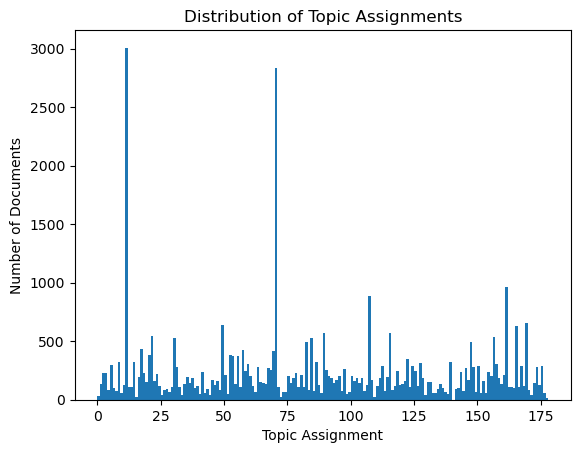

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
X = train_df['Sentence']

# Tokenize, remove stopwords, and lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

tokenized_documents = [word_tokenize(doc.lower()) for doc in X]
filtered_documents = [[lemmatizer.lemmatize(word) for word in doc if word.isalnum() and word not in stop_words] for doc in tokenized_documents]

# Create a dictionary and a corpus
dictionary = Dictionary(filtered_documents)
corpus = [dictionary.doc2bow(doc) for doc in filtered_documents]

# Build the LDA model
num_topics = 178  # Choose the number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)

# Get document-topic probabilities
document_topic_probs = [lda_model[doc] for doc in corpus]

# Extract topic assignments for each document
topic_assignments = [max(prob, key=lambda x: x[1])[0] for prob in document_topic_probs]

# Visualize the distribution of topic assignments
plt.hist(topic_assignments, bins=range(num_topics + 1))
plt.xlabel('Topic Assignment')
plt.ylabel('Number of Documents')
plt.title('Distribution of Topic Assignments')
plt.show()

In [60]:
# Sample sentence
sample_sentence = 'baking cookies'

# Tokenize, remove stopwords, and lemmatize the sample sentence
tokenized_sample = [lemmatizer.lemmatize(word) for word in word_tokenize(sample_sentence.lower()) if word.isalnum() and word not in stop_words]

# Convert the tokenized sample to a bag-of-words representation
sample_bow = dictionary.doc2bow(tokenized_sample)

# Infer the topic distribution for the sample sentence
sample_topic_distribution = lda_model[sample_bow]

# Get the most probable topic for the sample sentence
most_probable_topic = max(sample_topic_distribution, key=lambda x: x[1])[0]

print(f"The sample sentence belongs to Topic {most_probable_topic + 1}.")


The sample sentence belongs to Topic 103.
